# Week 3 Assignment
## MBP 1201 - Introductory Biostatistics

## Submission format

This assignment should be submitted online on Quercus by Oct 10, 11:59 pm EDT. Your submission should include a single file:

1. FIRSTNAME_LASTNAME.STUDENTNUMBER.ipynb containing all of the Python code, plots, and plain-text responses you’ve used to answer the questions.

In [1]:
# imports
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import pandas as pd

## Exercise 1. Implementing ANOVA (4 marks)

Calculate the mean and standard deviation of the Strength for all 4 groups using the data contained in `Anova_Example.csv`. The groups are labelled in the first column, titled Sample.

Using this data, calculate the following quantities:

* SST (sum of squares total)
* MSG (sum of squares between groups) 
* SSE (sum of square errors)
* MSE (mean square error)

Be sure to explicitly provide the number of groups, k, and the number of data points, n.

In [2]:
anova_data = np.genfromtxt('Anova_Example.csv', delimiter=',', skip_header=1)
sample_list = anova_data[:,0]; strength = anova_data[:,1]

# define variables
k = 4
n = sample_list.size
mu_grand = np.mean(strength)
std_grand = np.std(strength, ddof=1)
print(f'The total number of data points is {n} and the number of groups is {k}\nThe mean of group: {round(mu_grand, 3)}, the standard deviation of group: {round(std_grand,3)}')
group_stats = {}

# Group 1
mu_1 = np.mean(strength[sample_list==1]); sigma_1 = np.std(strength[sample_list==1], ddof=1)

# Group 2
mu_2 = np.mean(strength[sample_list==2]); sigma_2 = np.std(strength[sample_list==2], ddof=1)

# Group 3
mu_3 = np.mean(strength[sample_list==3]); sigma_3 = np.std(strength[sample_list==3], ddof=1)

# Group 4
mu_4 = np.mean(strength[sample_list==4]); sigma_4 = np.std(strength[sample_list==4], ddof=1)
print('Group   Mean    Std')
print(f'  1    {round(mu_1,3)}  {round(sigma_1,3)}\n  2     {round(mu_2,3)}  {round(sigma_2,3)}\n  3    {round(mu_3,3)}  {round(sigma_3,3)}\n  4     {round(mu_4,3)}  {round(sigma_4,3)}')

group_stats['1'] = [mu_1, sigma_1]
group_stats['2'] = [mu_2, sigma_2]
group_stats['3'] = [mu_3, sigma_3]
group_stats['4'] = [mu_4, sigma_4]

# compute SST
SST = np.sum((strength - mu_grand)**2)
SSG = 0

# iteratively compute SSG
for i, (key, value) in enumerate(group_stats.items()):
    SSG += strength[sample_list==(i+1)].size * (value[0] - mu_grand)**2

# compute MSG, SSE and MSE
MSG = SSG / (k-1)

SSE = SST - SSG
MSE = SSE / (n-k)

print(f'\nSST: {round(SST,3)}\nMSG: {round(MSG, 3)}\nSSE: {round(SSE,3)}\nMSE: {round(MSE,3)}')

The total number of data points is 40 and the number of groups is 4
The mean of group: 9.915, the standard deviation of group: 2.276
Group   Mean    Std
  1    11.203  1.995
  2     8.938  2.98
  3    10.683  1.102
  4     8.838  1.879

SST: 202.085
MSG: 14.54
SSE: 158.466
MSE: 4.402


## Exercise 2. Statistical Test Choice (4 marks)

A lab in Norway is conducting an experiment determining systematic changes in brain tumour volume between three imaging modalities (MRI, PET, SPECT). They recruit 30 patients and image every patient with MRI, PET, and SPECT within the same week (so tumour volume changes due to physiology are negligible). Tumour volumes for each modality are recorded, and now the researchers want to know what statistical test they should run to properly determine significance between the different volumes. What would be your preferred test here? 

Now, suppose that the three imaging modalities are performed over the course of a month in a random order, so tumour volume changes due to physiology are non-negligible. What statistical test is the right choice in this scenario?

- Part 1\
I prefer to use one-way repeated ANOVA test. Since now we only consider systematic factors that affect the volumes between three different imaging modalities and there is only one factor (independent variable) which are three different image modalities but we need to repeat the measurement for 30 patients. The tumour volume due to physiology will be negligible now so that we do not need to consider it. Therefore, one-way repeated ANOVA test can be used to determine the significance between three different modalities.

- Part 2\
I prefer to use repeated ANCOVA test. Since we are interesting assessing the systematic factors of three modalities on the tumour volume and the independent variable is only one which is three different image modalities but we need to repeat the measurement for 30 patients. Other parameters should be consider as confounding factors. So here we should control the temporal changes from physiology that affects the tumour volumes. Therefore, repeated ANCOVA test can be used to determine the significance between three different modalities.

## Exercise 3. Linear fitting (4 marks)

Determine the slope, intercept, SSE, and $R^2$ for the data in `Linear_fitting.csv` using `sklearn.linear_model.LinearRegression()`. The $x$-axis is listed in the first column and the $y$-axis is listed in the second column.

Make a scatter plot of the data, and overplot the line of best fit from linear regression. What is the Pearson $r$ value for linear correlation between $x$ and $y$? Is this significant?

slope: 0.8076538006153113
intercept: -0.11803224663775325
R^2: 0.8296665011127407
SSE: 16.985137917057884


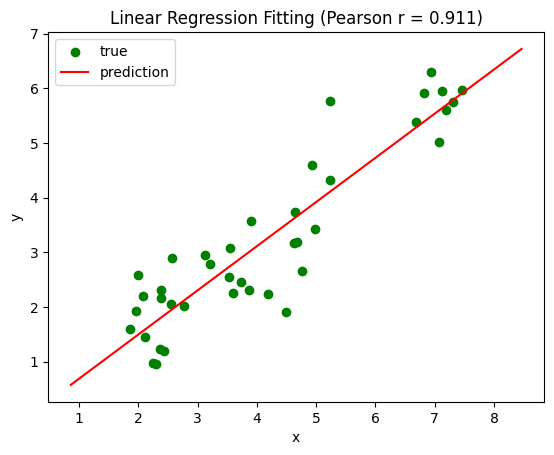

Since the p-value of the Pearson r is 3.4852843342135473e-16 which is much smaller than 0.05 significance level, we will reject the null hypothesis that there is no correlation between x_comp and y_comp.
Therefore, the Pearson r is significant.


In [3]:
def line(x, m, b):
    """
    Equation of line
    """
    return m*x + b

linear_data = np.genfromtxt('Linear_Fitting.csv', delimiter=',')
x_comp = linear_data[:,0]; y_comp = linear_data[:,1]
reg = LinearRegression().fit(x_comp.reshape(-1, 1), y_comp)
slope = reg.coef_[0]
intercept = reg.intercept_
r2 = reg.score(x_comp.reshape(-1, 1), y_comp)
y_pred = reg.predict(x_comp.reshape(-1, 1))
sse = np.sum((y_pred - y_comp)**2)
pr = pearsonr(x_comp, y_comp).statistic
print(f'slope: {slope}\nintercept: {intercept}\nR^2: {r2}\nSSE: {sse}')

X = np.linspace(x_comp.min()-1, x_comp.max()+1, 1000)
Y = line(X, slope, intercept)
plt.scatter(x_comp, y_comp, color='g')
plt.plot(X, Y, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Linear Regression Fitting (Pearson r = {round(pr,3)})')
plt.legend(['true', 'prediction'])
plt.show()

print(f'Since the p-value of the Pearson r is {pearsonr(x_comp, y_comp).pvalue} which is much smaller than 0.05 significance level, we will reject the null hypothesis that there is no correlation between x_comp and y_comp.\n\
Therefore, the Pearson r is significant.')

## Exercise 4. Logarithmic Normalization (4 marks)

Suppose $X$ is a non-normal distribution, but $\log(X) := \{\log(x) : x \in X\}$ is normal. This is valuable for implementing ANOVA analysis in non-normally distributed data. 

1. Define $\mu_Y$ be the mean of an arbitrary distribution $Y$. Does $\log(\mu_X) = \mu_{\log(X)}$? Why or why not?
1. Does $\text{median}(\log(X)) = \log(\text{median}(X))$? What about the mode?

**Bonus (1 mark, optional)**: Suppose that we perform an experiment where $X$ represents the concentration of a PET radiotracer over time. We have determined via linear regression that the line of best fit is $\log(X) = -{1\over 2}t + 100 + \epsilon(t)$, where $\epsilon(t) \sim N(0, 20)$ is a noise-related term. What is the half-life of the PET radiotracer?


- Part 1\
$\log(\mu_{X})$ is not equal to $\mu_{\log(X)}$, here is the verification:
$$
\log(\mu_{X}) = \log({1 \over n}{\sum_{i=1}^n x_{i}})\\
\mu_{\log(X)} = {1 \over n}{\sum_{i=1}^n \log(x_{i})} = {1 \over n}\log({\prod_{i=1}^n x_{i}}) = \log({\prod_{i=1}^n x_{i}^{1 \over n}})
$$
**Since $\log({1 \over n}{\sum_{i=1}^n x_{i}}) \neq \log({\prod_{i=1}^n x_{i}^{1 \over n}})$, we can easily conclude that $\log(\mu_{X})$ is not equal to $\mu_{\log(X)}$.**

- Part 2
    - Median  
        Median is the middle value of a dataset when it is arranged in ascending or descending order. There are two cases that when calculating the median after X is sorted in ascending order or descending order:
        $$
        median(X) = \begin{cases} X_{n+1 \over 2}, \text{n is odd} \\ {X_{n \over 2}+X_{n+2 \over 2} \over 2}, \text{n is even} \end{cases}
        $$
        Where n is the size of the distribution X. Since the logarithmic function is monotonical increasing which means it is one-on-one mapping and $x1 < x2$ -> $\log(x1) < \log(x2)$. Therefore, after the distribution X is sorted, the $\log(X)$ should have exactly the same order. we will have 
        $$
        median(\log(X)) = \begin{cases} \log(X_{n+1 \over 2}), \text{n is odd} \\ {\log(X_{n \over 2})+\log(X_{n+2 \over 2}) \over 2}={\log((X_{n \over 2}X_{n+2 \over 2})^{1 \over 2})}, \text{n is even} \end{cases}
        $$
        When n is even,
        $$
        {\log(median(X)) = \log({X_{n \over 2}+X_{n+2 \over 2} \over 2})} \ne {\log((X_{n \over 2}X_{n+2 \over 2})^{1 \over 2})} = median(\log(X))
        $$
        **From the above, we can conclude that $\text{median}(\log(X)) = \log(\text{median}(X))$ is not true when the size of the distribution X is even but true when the size of the distribution X is odd.**
    - Mode  
        Mode is the most frequently existed element in the distribution. Since the logarithmic function is monotonical increasing which means it is one-on-one mapping, the occurence of every number in distribution X will be the same as its logarithmic value in the $\log(X)$ distribution. **Therefore, we can conclude that $mode(\log(X)) = \log(mode(X))$ is equal.**

- Bonus\
Accoring to the definition of half-life of the PET radiotracer, it is the time it takes for half of the radioactive atoms (or nuclei) of the specific radioisotope in the tracer to decay or disintegrate. Now we can re-build the equation for the PET radiotracer
$$
X(t) = e^{-{1\over 2}t + 100 + \epsilon(t)}
X(0) = e^{0 + 100 + \epsilon(0)}, where\ \epsilon(0) = 0.08920620580763855,\ 
X_{0} = X(0) = e^{100 + 0.08920620580763855} = 2.938934812606394e+43
$$
Then the half-life of the PET radiotracer is
$$
{X_{0} \over 2} = X_{0} * e^{-{1\over 2}t_{half-life} + \epsilon(t)}
t_{half-life} = {\ln({1 \over 2}) \over -{1 \over 2}} = 1.386\ (units \ of \ t)
$$
Here we ignore the noise term since it is not related to the decay of the PET radiotracer but to the linear regression fitting.

## Exercise 5. FDR (4 marks)
Use the Benjamini-Hochberg method to determine from the file `p-values_FDR.csv` which p-values survive the FDR threshold of 0.05.

In [4]:
p_values = np.genfromtxt('p-values_FDR.csv', delimiter=',')
sorted_p_values = np.sort(p_values)
m = sorted_p_values.size
#reject = np.zeros(shape=p_values.shape, dtype=np.int64)
FDR = 0.05
df = pd.DataFrame(index=np.arange(m), columns=['i', 'p', 'p_i', 'Reject'])
for i, j in enumerate(sorted_p_values):
    reject = 0
    p_i = round((i+1)*FDR / m, 4)
    if j < p_i:
        reject = 1
    df.loc[i] = [i+1, j, p_i, reject]
print(df.to_string(index=False))
print(f'\nThe following p-values are survived the FDR threshold of 0.05:\n{df.p[df.Reject == 1].to_string(index=False)}')

 i       p     p_i Reject
 1  0.0001  0.0025      1
 2  0.0005   0.005      1
 3  0.0017  0.0075      1
 4  0.0023    0.01      1
 5   0.003  0.0125      1
 6   0.015   0.015      0
 7   0.021  0.0175      0
 8   0.032    0.02      0
 9   0.038  0.0225      0
10   0.044   0.025      0
11    0.05  0.0275      0
12   0.066    0.03      0
13   0.083  0.0325      0
14    0.16   0.035      0
15    0.33  0.0375      0
16    0.46    0.04      0
17    0.63  0.0425      0
18     0.7   0.045      0
19    0.75  0.0475      0
20    0.84    0.05      0

The following p-values are survived the FDR threshold of 0.05:
 0.0001
 0.0005
 0.0017
 0.0023
  0.003
